In [1]:
import numpy as np
import random
import sys
import matplotlib.pyplot as plt
import pandas as pd
a = sys.path.append('../modules/') # endereco das funcoes implementadas por voce!
import plot_3D, auxiliars, salve_doc, sphere, sample_random, Operators

In [2]:
acquisition =  {'nx': 100,
                  'ny': 100,
                  'xmin': -10000,
                  'xmax': 10000,
                  'ymin': -10000,
                  'ymax': 10000,
                  'z': -100.0,
                  'color': '.r'}

cood_bounds = {'xmax': 250.0,
                'xmin': 40.0,
                'ymax': 100.0,
                'ymin': 0.0,
                'zlim': 150,
                'z_min': 100,
                'n': 5}

mag_bounds = {'inclmax': -20.0,
                'inclmin': 15.0,
                'declmax': 20.0,
                'declmin': -15.0,
                'magmax': 5.0,
                'magmin': 1.0,
                'homogeneo': True,
                'n': 5}

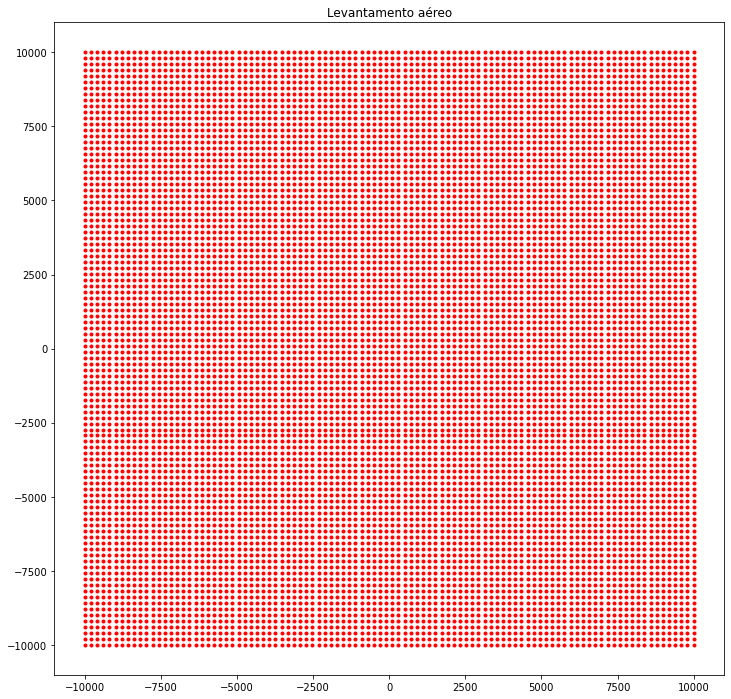

In [3]:
coodX, coodY, coodZ = sample_random.sample_random_coordinated(**cood_bounds)

incl, decl, mag = sample_random.sample_random_mag(**mag_bounds)

x, y, X, Y, Z = plot_3D.create_aquisicao(**acquisition)

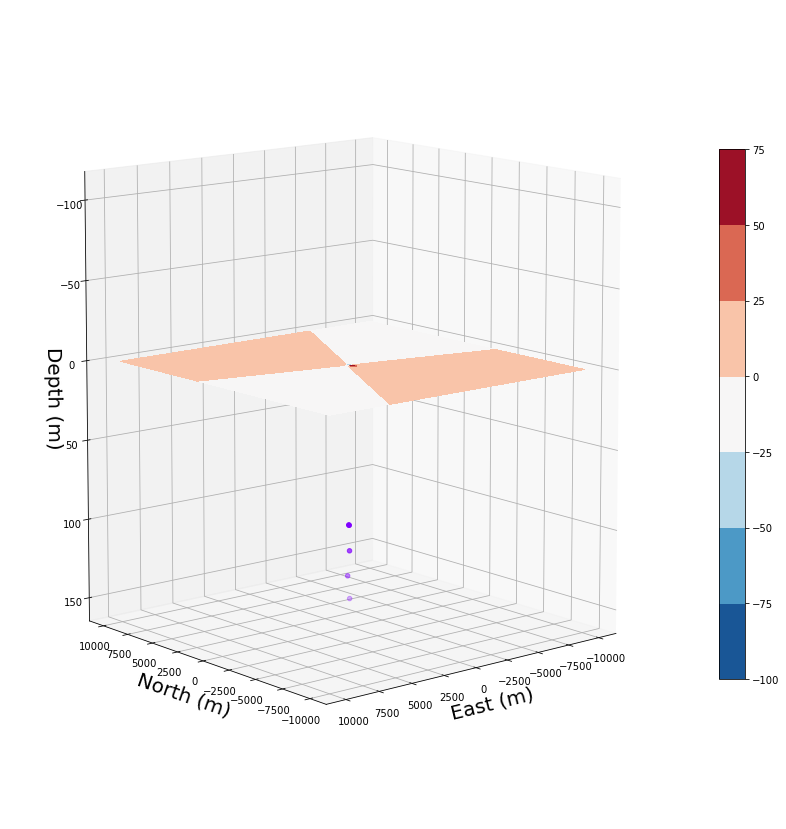

In [4]:
balls_mag = {'incl': incl,
               'decl': decl,
               'mag': mag,
               'n': 5,
               'Xref': X,
               'Yref': Y,
               'Zref': Z,
               'I': 30.0,
               'D': 50.0,
               'coodX': coodX,
               'coodY': coodY,
               'coodZ': coodZ,
               'raio': 100.0}

tfa_n_bolinhas = sample_random.tfa_n_dots(**balls_mag)

plot_3D.modelo_anomalia_3D(Y, X, tfa_n_bolinhas, coodY, coodX, coodZ, mag)

In [5]:
population = {'xmax': 10000.0,
                'xmin': -10000.0,
                'ymax': 10000.0,
                'ymin': -10000.0,
                'zlim': 150.0,
                'z_min': 0.0,
                'n_dip': 5,
                'n_pop': 10,
                'inclmax': -80.0,
                'inclmin': 15.0,
                'declmax': 172.0,
                'declmin': -15.0,
                'magmax': 5.0,
                'magmin': 0.5,
                'homogeneo': True
                }

pop = Operators.create_population(**population)
print(pop)

[array([[-4.43887e+03, -5.57435e+03,  3.97400e+01, -5.92800e+01,
         1.81800e+01,  1.55000e+00],
       [-9.74717e+03, -5.37964e+03,  3.47200e+01, -5.92800e+01,
         1.81800e+01,  1.55000e+00],
       [ 9.71708e+03,  2.61107e+03,  1.40890e+02, -5.92800e+01,
         1.81800e+01,  1.55000e+00],
       [ 7.36391e+03,  2.99367e+03,  8.73700e+01, -5.92800e+01,
         1.81800e+01,  1.55000e+00],
       [ 2.99613e+03,  8.38750e+02,  5.50600e+01, -5.92800e+01,
         1.81800e+01,  1.55000e+00]]), array([[-8.44389e+03, -2.99907e+03,  8.53100e+01, -2.81800e+01,
         3.74400e+01,  3.20000e+00],
       [ 9.30098e+03, -2.23783e+03,  1.19720e+02, -2.81800e+01,
         3.74400e+01,  3.20000e+00],
       [-2.04470e+02, -8.77650e+03,  2.32500e+01, -2.81800e+01,
         3.74400e+01,  3.20000e+00],
       [-9.17140e+02, -4.97000e+01,  7.37700e+01, -2.81800e+01,
         3.74400e+01,  3.20000e+00],
       [ 2.20169e+03, -8.01010e+03,  1.38400e+02, -2.81800e+01,
         3.74400e+01,  3

In [6]:
I, D = 30.0, 50.0
fit_cada = Operators.fit_value(X, Y, Z, I, D, pop, tfa_n_bolinhas)
print(fit_cada)

[332.4, 619.9, 482.5, 222.49, 184.23, 488.09, 275.37, 383.45, 1397.18, 837.85]


In [7]:
'''#PLOT DOS FITNESS INICIAIS

x_param = list(range(100))
print(len(fit_cada), len(x_param))

fig = plt.figure(figsize=(10, 12))
plt.bar(x_param, fit_cada, align = 'center', color = 'r')

plt.show()
'''

"#PLOT DOS FITNESS INICIAIS\n\nx_param = list(range(100))\nprint(len(fit_cada), len(x_param))\n\nfig = plt.figure(figsize=(10, 12))\nplt.bar(x_param, fit_cada, align = 'center', color = 'r')\n\nplt.show()\n"

In [8]:
pais_torneio = Operators.tournament_selection(pop, fit_cada)
print(pais_torneio)

[array([[-5.04811e+03, -7.56075e+03,  9.20700e+01, -3.28800e+01,
        -9.71000e+00,  2.91000e+00],
       [-8.06326e+03, -6.95867e+03,  3.69500e+01, -3.28800e+01,
        -9.71000e+00,  2.91000e+00],
       [-8.57707e+03,  6.30953e+03,  9.89900e+01, -3.28800e+01,
        -9.71000e+00,  2.91000e+00],
       [ 6.71963e+03, -1.24239e+03,  1.00260e+02, -3.28800e+01,
        -9.71000e+00,  2.91000e+00],
       [ 6.44146e+03, -6.31610e+02,  8.03000e+00, -3.28800e+01,
        -9.71000e+00,  2.91000e+00]]), array([[-8.44389e+03, -2.99907e+03,  8.53100e+01, -2.81800e+01,
         3.74400e+01,  3.20000e+00],
       [ 9.30098e+03, -2.23783e+03,  1.19720e+02, -2.81800e+01,
         3.74400e+01,  3.20000e+00],
       [-2.04470e+02, -8.77650e+03,  2.32500e+01, -2.81800e+01,
         3.74400e+01,  3.20000e+00],
       [-9.17140e+02, -4.97000e+01,  7.37700e+01, -2.81800e+01,
         3.74400e+01,  3.20000e+00],
       [ 2.20169e+03, -8.01010e+03,  1.38400e+02, -2.81800e+01,
         3.74400e+01,  3

In [9]:
filho = Operators.crossover(pais_torneio)
print(len(filho[0][0]))

6


In [10]:
filhos_mut = {'xmax': 10000.0,
                'xmin': -10000.0,
                'ymax': 10000.0,
                'ymin': -10000.0,
                'zlim': 150.0,
                'z_min': 0.0,
                'n': 1,
                'inclmax': -80.0,
                'inclmin': 15.0,
                'declmax': 172.0,
                'declmin': -15.0,
                'magmax': 5.0,
                'magmin': 0.5,
                'homogeneo': True
                }

filhos = Operators.mutacao(filho, **filhos_mut)

In [11]:
populacao_1 = Operators.elitismo(pop, filhos, fit_cada)

In [14]:
populacao = Operators.create_population(**population)
print("População Inicial: {}".format(populacao))
print("\n")

val_fit = []

for i in range(100):
    fit_ = Operators.fit_value(X, Y, Z, I, D, populacao, tfa_n_bolinhas)
    pais_ = Operators.tournament_selection(populacao, fit_)
    filho_ = Operators.crossover(pais_)
    filho_ = Operators.mutacao(filho_, **filhos_mut)
    populacao = Operators.elitismo(populacao, filho_, fit_)
    #fit_cont = Operators.fit_value(X, Y, Z, I, D, populacao, tfa_n_bolinhas)
    #min_fit = min(fit_cont)
    #val_fit.append(min_fit)

last_fit = Operators.fit_value(X, Y, Z, populacao, tfa_n_bolinhas)



População Inicial: [array([[ 5.68384e+03, -9.31270e+02,  4.91400e+01, -4.29000e+01,
         1.28080e+02,  1.61000e+00],
       [-3.51124e+03, -8.55243e+03,  7.13300e+01, -4.29000e+01,
         1.28080e+02,  1.61000e+00],
       [ 2.78652e+03, -9.66235e+03,  1.17690e+02, -4.29000e+01,
         1.28080e+02,  1.61000e+00],
       [ 8.59199e+03, -5.24587e+03,  9.23700e+01, -4.29000e+01,
         1.28080e+02,  1.61000e+00],
       [ 6.43036e+03,  5.40941e+03,  3.74000e+01, -4.29000e+01,
         1.28080e+02,  1.61000e+00]]), array([[ 7.07256e+03,  6.57607e+03,  4.00000e+01,  3.99000e+00,
         7.80000e-01,  4.48000e+00],
       [-6.31650e+03,  4.22870e+02,  6.04300e+01,  3.99000e+00,
         7.80000e-01,  4.48000e+00],
       [-1.18654e+03, -5.90468e+03,  9.40400e+01,  3.99000e+00,
         7.80000e-01,  4.48000e+00],
       [-6.18058e+03,  8.13497e+03,  1.16590e+02,  3.99000e+00,
         7.80000e-01,  4.48000e+00],
       [ 5.40826e+03,  5.21411e+03,  2.20200e+01,  3.99000e+00,
     

IndexError: index 5 is out of bounds for axis 0 with size 5

In [ ]:
print(f'Última geração tem como o menor fitness: {min(last_fit)}')